# Work Overview

This document aims to show what work I have completed with a mix of actual code and indepth text blocks explaining what I have done. Everything is viewable at 'https://github.com/DJSaunders1997/Masters-Project/'

## Getting Data

Mouse data was downloaded from 'https://github.com/gabysbrain/datasets' as instructed and mouse data found in '/datasets-sa_mouse_tracking/'.

I can't exactly remeber which scripts I ran, some of the seemed to not work and delete all the data but I ended up with a single 'mouse_events.json' file containing all data for the Turk Study data and a folder of 30ish smaller json files such as 'no-sa_2016-12-29 20_48_14-2.json' for the Lab Study.
This data is saved on my gitHub repo under 'All-Data.zip'.

# Exploring the JSON files

I'm unsure how to analyse JSON data directly so next I had to find a way to convert the JSON into a structed more familiar tabular csv format. The Turk Studys 'mouse_events.json' looks like this 

In [1]:
'''
[
  {
    "events": [
      {
        "button": 1,
        "event_type": "mousedown",
        "target": "alloc-slider-1",
        "time": 1417182276985,
        "x": 477,
        "y": 405
      },
      {
        "button": 1,
        "event_type": "mouseup",
        "target": "alloc-slider-1",
        "time": 1417182277096,
        "x": 478,
        "y": 405
      }
    ],
    "step": "1",
    "turkId": "A35YFAFWP33C70"
  },
  ...
  ''';

The Lab study data consists of many files in this format. The mouseevents-events looks the same as the Turk Study other than all the turkIds being set to 0. There is also additional information about the user which is not used to study mouse data so it can be ignored.

In [2]:
'''
{
    "mouseevents-events": "[{\"turkId\":0,\"step\":\"1\",\"events\":[{\"x\":433,\"y\":331, #THIS LINE IS CUT SHORT. TOO LONG TO SHOW ALL#
    "demographics-turk_id": "\"0\"",
    "demographics-assignment_id": "\"ASSIGNMENT_ID_NOT_AVAILABLE\"",
    "demographics-age": "\"17\"",
    "demographics-computer_experience": "\"2\"",
    "demographics-investment_experience": "\"1\"",
    ...
}
'''

'\n{\n    "mouseevents-events": "[{"turkId":0,"step":"1","events":[{"x":433,"y":331, #THIS LINE IS CUT SHORT. TOO LONG TO SHOW ALL#\n    "demographics-turk_id": ""0"",\n    "demographics-assignment_id": ""ASSIGNMENT_ID_NOT_AVAILABLE"",\n    "demographics-age": ""17"",\n    "demographics-computer_experience": ""2"",\n    "demographics-investment_experience": ""1"",\n    ...\n}\n'

# Converting Turk Mouse events into CSV

This is all handled by functions inside of the JSONtoCSV.py file I've created as shown below. 

Can't explain exactly what the functions do as they were written ages ago and need to be recommented properly. The functions also 'normalize' the time field. Rather than the time for each mouse event being recorded in UNIX time, the first mouse event of a user is changed to 0 and the rest of that users mouse events are given in seconds since the first mouse event.

Before running this code the 'Original-Data.zip' file must be unzipped to a folder named 'Original-Data'. It needs to be zipped as the file is too big to be uploaded to github otherwise.

In [3]:
import pandas as pd

from JSONtoCSV import convert_json_to_csv # import function to convert Turk data

# Should take around a minute to process.
#
df_turk = convert_json_to_csv(r'Original-Data\all_turk_study_data\mouse_events.json', 'Turk-Data.csv')
print(f'\n Number of rows: {df_turk.shape[0]} ')
df_turk.head()

1 / 152112 completed A35YFAFWP33C70
10001 / 152112 completed A10WZYTR4O4V6S
20001 / 152112 completed A30OOETQPWFPHK
30001 / 152112 completed A309P6D2ECOLH7
40001 / 152112 completed A2ZH6W3O33PVJZ
50001 / 152112 completed ASB8T0H7L99RF
60001 / 152112 completed A3JI3B5GTVA95F
70001 / 152112 completed AVPKE76DJLWK6
80001 / 152112 completed A1DJD0J0BTE1X8
90001 / 152112 completed A3F3LNKCCXS42L
100001 / 152112 completed A1I20G9FII2FN5
110001 / 152112 completed A3J2CI4J5V3MLP
120001 / 152112 completed A1P8M5BKOTAA8I
130001 / 152112 completed A2QYPEWPAGGKLQ
140001 / 152112 completed A30QJF394U1VRY
150001 / 152112 completed AAOCGTXKZTC8H
Time taken: 46 s

 Number of rows: 1293073 


,button,event_type,target,time,x,y,step,turkId
0,1,mousedown,alloc-slider-1,0.000,477.0,405.0,1,A35YFAFWP33C70
1,1,mouseup,alloc-slider-1,0.111,478.0,405.0,1,A35YFAFWP33C70
2,1,click,alloc-slider-1,0.111,478.0,405.0,1,A35YFAFWP33C70
3,1,mousedown,alloc-slider-1,1.516,479.0,405.0,1,A35YFAFWP33C70
4,1,mousedirchange,alloc-slider-1,2.395,543.0,403.0,1,A35YFAFWP33C70


I've shown that the turk data can be converted, but the lab study is more challenging. This script goes through the files in a given directory looking for JSON files and puts them together into a single dataframe. 

Each individual is also assigned a new turk ID as in the JSON file they're all set to 0. Additionally the file the data came from is appended as a new column so that we can compare sa or no sa in the future if we want to. As before the time is also normilized.

It's worth noteing that the targets are different for the Turk and Lab data. Turk data has items like 'alloc-slider-1' where as Lab data is of the format '[id="alloc-slider-return-4"]>svg>g>circle'. Looks like these just need to be renamed so they match up but some of the Lab data targets are hard to understand. 

In [4]:
from JSONtoCSV import lab_convert_json_to_csv # import function to convert Lab data

# Should take around a minute to process.
#
df_lab = lab_convert_json_to_csv(r'Original-Data\all_lab_study_data', 'Lab-Data.csv')
print(f'\n Number of rows: {df_lab.shape[0]} ')
df_lab.head()

Opening File global_sa_sl_both_2017-02-08 12_48_51.json
1 / 807 completed
201 / 807 completed
401 / 807 completed
601 / 807 completed
801 / 807 completed
Opening File global_sa_sl_both_2017-02-09 17_28_24.json
1 / 1274 completed
201 / 1274 completed
401 / 1274 completed
601 / 1274 completed
801 / 1274 completed
1001 / 1274 completed
1201 / 1274 completed
Opening File global_sa_sl_both_2017-02-09 17_28_30.json
1 / 1274 completed
201 / 1274 completed
401 / 1274 completed
601 / 1274 completed
801 / 1274 completed
1001 / 1274 completed
1201 / 1274 completed
Opening File global_sa_sl_both_2017-02-10 18_16_36.json
1 / 258 completed
201 / 258 completed
Opening File global_sa_sl_both_2017-02-13 11_15_26.json
1 / 282 completed
201 / 282 completed
Opening File global_sa_sl_both_2017-02-13 11_50_43.json
1 / 314 completed
201 / 314 completed
Opening File global_sa_sl_both_2017-02-15 17_28_32.json
1 / 1169 completed
201 / 1169 completed
401 / 1169 completed
601 / 1169 completed
801 / 1169 completed

,button,event_type,target,time,x,y,step,turkId,file
0,1,mousedown,"[id=""alloc-slider-return-4""]>svg>g>circle",0.000000,397.0,647.0,1,ID1,global_sa_sl_both_2017-02-08 12_48_51.json
1,1,mouseup,"[id=""alloc-slider-return-4""]>svg>g>circle",0.547000,423.0,642.0,1,ID1,global_sa_sl_both_2017-02-08 12_48_51.json
2,1,click,"[id=""alloc-slider-return-4""]>svg>g>circle",0.547000,423.0,642.0,1,ID1,global_sa_sl_both_2017-02-08 12_48_51.json
3,1,mousedown,"[id=""alloc-slider-return-4""]>svg>g>circle",1.176995,426.0,642.0,1,ID1,global_sa_sl_both_2017-02-08 12_48_51.json
4,1,mousedirchange,"[id=""alloc-slider-return-4""]>svg>g>circle",1.790000,440.0,640.0,1,ID1,global_sa_sl_both_2017-02-08 12_48_51.json


We now have the 1,293,073 rows of Turk data and the 58,285 rows of Lab data in a format we can work with. Now some initial exploration of the data can begin.

# Renaming Items

NOTE This section was added much later than the others once I finally got a good grip on the data.
After throrough exploration and analysis I understood what items need to be renamed and which onces had to stay the same and what items needed to be renamed to 'html'.
This section was added here on 07/08/2020 so that I could see how the SVMs stack up to the new data.

In [5]:
df_lab

,button,event_type,target,time,x,y,step,turkId,file
0,1,mousedown,"[id=""alloc-slider-return-4""]>svg>g>circle",0.000000,397.0,647.0,1,ID1,global_sa_sl_both_2017-02-08 12_48_51.json
1,1,mouseup,"[id=""alloc-slider-return-4""]>svg>g>circle",0.547000,423.0,642.0,1,ID1,global_sa_sl_both_2017-02-08 12_48_51.json
2,1,click,"[id=""alloc-slider-return-4""]>svg>g>circle",0.547000,423.0,642.0,1,ID1,global_sa_sl_both_2017-02-08 12_48_51.json
3,1,mousedown,"[id=""alloc-slider-return-4""]>svg>g>circle",1.176995,426.0,642.0,1,ID1,global_sa_sl_both_2017-02-08 12_48_51.json
4,1,mousedirchange,"[id=""alloc-slider-return-4""]>svg>g>circle",1.790000,440.0,640.0,1,ID1,global_sa_sl_both_2017-02-08 12_48_51.json
...,...,...,...,...,...,...,...,...,...
58280,1,click,"[id=""portfolio-selection""]>div:nth-child(3)>di...",275.048950,942.0,1248.0,1,ID18,study_results.all.json
58281,1,click,"[id=""portfolio-selection""]>div:nth-child(3)>di...",275.048950,942.0,1248.0,2,ID18,study_results.all.json
58282,1,click,"[id=""portfolio-selection""]>div:nth-child(3)>di...",275.048950,942.0,1248.0,3,ID18,study_results.all.json
58283,1,click,"[id=""portfolio-selection""]>div:nth-child(3)>di...",275.048950,942.0,1248.0,4,ID18,study_results.all.json


In [6]:
df_turk['target'].value_counts(), df_lab['target'].value_counts() 

(alloc-slider-2                                                                                                                                                                                                                                                                                 170652
 alloc-slider-5                                                                                                                                                                                                                                                                                 155753
 alloc-slider-4                                                                                                                                                                                                                                                                                 153602
 html > body > main > div#content > form#portfolio-selection > div.investment-test > div.portfolio-interface.row > 

### Renaming Targets

Here I will rename the tagets so that theyre more understandable.
First Idea was to look through each unique html element and try to map it to a more human readable name, but there was way to many.
Looking through the data the items were iterested in are "alloc-slider-X" where X is 1,2,3,4,5.
So it was decided to search for any html elements and rename them to "html other".
To do this any recored containing '>' was renamed.


In [7]:
# Before TURK rename
df_turk['target'].value_counts()

alloc-slider-2                                                                                                                                                                                                                                                                                 170652
alloc-slider-5                                                                                                                                                                                                                                                                                 155753
alloc-slider-4                                                                                                                                                                                                                                                                                 153602
html > body > main > div#content > form#portfolio-selection > div.investment-test > div.portfolio-interface.row > div.

In [8]:
# RENAME TURKS

# Turk target  might be 
# html > body > main > div#content > form#portfolio-selection
# > div.investment-test > div.portfolio-interface.row > div.stock-selection.large-7.columns 
# > div.stock-allocator.row.valign-middle > div.large-4.columns > div#alloc-slider-return-0.sparkline.narrow.return 
# > svg.chart.control > g > circle.handle
# So pick up on the > and rename
df_turk.loc[df_turk['target'].str.contains('>'), 'target'] = 'html_other'

# See how there are many targets not renamed and their distributions
df_turk['target'].value_counts()

html_other               490349
alloc-slider-2           170652
alloc-slider-5           155753
alloc-slider-4           153602
alloc-slider-1           131002
alloc-slider-3           124736
html                      23808
portfolio-selection       15282
investment-results        12167
portfolio-stats            6039
content                    2713
risk-return                1147
alloc-slider-return-3      1040
alloc-slider-return-1       630
saved-port-0                591
alloc-slider-return-2       470
saved-port-1                445
alloc-slider-risk-1         435
alloc-slider-return-0       426
alloc-slider-risk-3         374
alloc-slider-return-4       328
alloc-slider-risk-4         287
alloc-slider-risk-0         245
alloc-slider-risk-2         201
saved-port-2                196
saved-port-3                 86
saved-port-4                 40
saved-port-5                  9
parsley-id-3644               7
saved-port-6                  6
parsley-id-2586               2
parsley-

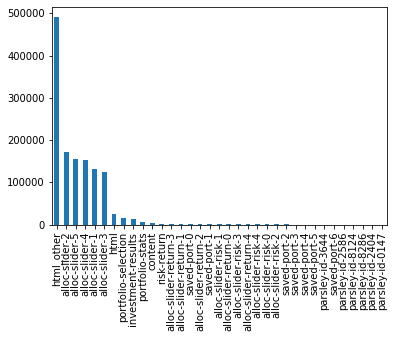

In [9]:
df_turk['target'].value_counts().plot(kind='bar')

In [10]:
# Before LAB rename
df_lab['target'].value_counts()

[id="alloc-slider-return-3"]>svg                                                                            4531
[id="portfolio-selection"]>div:nth-child(1)>div>div:nth-child(1)>div:nth-child(6)>div:nth-child(2)>input    3138
[id="alloc-slider-return-1"]>svg                                                                            2544
[id="alloc-slider-return-4"]>svg                                                                            2399
[id="alloc-slider-return-2"]>svg                                                                            2294
                                                                                                            ... 
[id="alloc-slider-return-4"]>svg>g                                                                             1
[id="portfolio-selection"]>div:nth-child(3)>div>div:nth-child(1)>div:nth-child(4)                              1
[id="investment-results"]>table>tbody                                                           

In [11]:
# RENAME LABS

# TODO Labs seem to have many more "html_other" elements than TURK. 
# Might have to rename some of the items to make them more even.

# lab target  might be 
# [id="alloc-slider-risk-4"]>svg

# So pick up on the > and rename
df_lab.loc[df_lab['target'].str.contains('>'), 'target'] = 'html_other'

df_lab.to_csv('lab-Data-renamed.csv')   # save changes

# See how there are many targets not renamed and their distributions
df_lab['target'].value_counts()

html_other               49438
alloc-slider-2            2002
alloc-slider-3            1170
alloc-slider-5             902
alloc-slider-4             788
alloc-slider-1             708
portfolio-selection        622
html                       524
alloc-slider-return-3      436
investment-results         258
alloc-slider-risk-1        233
risk-return                175
alloc-slider-return-2      165
alloc-slider-return-0      136
alloc-slider-risk-3        123
alloc-slider-return-1      103
alloc-slider-risk-0        101
saved-port-0                75
survey-container            71
saved-port-1                60
alloc-slider-risk-2         52
content                     41
alloc-slider-risk-4         35
alloc-slider-return-4       29
pretest3                    12
pretest2                     8
pretest4                     6
pretest1                     5
parsley-id-137               4
saved-port-6                 3
Name: target, dtype: int64

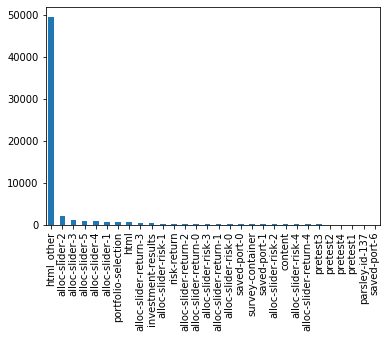

In [12]:
# Comparing this plot for lab values compared to the turk values we can see that html other has a much higher proportion of the targets.
# If we look at the value counts before renaming we can see that the most frequent item is [id="alloc-slider-return-3"]>svg.
# I will rename html elements like [id="alloc-slider-return-3"]>svg to alloc-slider-3.
# Goal is to make the distributions of values for the 2 categories look more similar.
# Other analysis for this project so far has shown that the lab and turk datas cannot be easily identified with number of mouse events,
# therefore I would expect the distribution of sliders to look very similar.

df_lab['target'].value_counts().plot(kind='bar')

In [13]:
# Rename LAB data 
# rename some html elemets to alloc-slider-X

# Reload df_lab as original unaltered data
df_lab = pd.read_csv('Lab-Data.csv', index_col=0)

# Indexs for html elements start at 0.
# alloc-sliders do not.
df_lab.loc[df_lab['target'].str.contains('alloc-slider-return-0'), 'target'] = 'alloc-slider-1'
df_lab.loc[df_lab['target'].str.contains('alloc-slider-return-1'), 'target'] = 'alloc-slider-2'
df_lab.loc[df_lab['target'].str.contains('alloc-slider-return-2'), 'target'] = 'alloc-slider-3'
df_lab.loc[df_lab['target'].str.contains('alloc-slider-return-3'), 'target'] = 'alloc-slider-4'
df_lab.loc[df_lab['target'].str.contains('alloc-slider-return-4'), 'target'] = 'alloc-slider-5'

df_lab.loc[df_lab['target'].str.contains('alloc-slider-risk-0'), 'target'] = 'alloc-slider-1'
df_lab.loc[df_lab['target'].str.contains('alloc-slider-risk-1'), 'target'] = 'alloc-slider-2'
df_lab.loc[df_lab['target'].str.contains('alloc-slider-risk-2'), 'target'] = 'alloc-slider-3'
df_lab.loc[df_lab['target'].str.contains('alloc-slider-risk-3'), 'target'] = 'alloc-slider-4'
df_lab.loc[df_lab['target'].str.contains('alloc-slider-risk-4'), 'target'] = 'alloc-slider-5'

# Now sliders are renamed we can deal with the other html elements

df_lab.loc[df_lab['target'].str.contains('>'), 'target'] = 'html'

# Also remove some of the other nosensical data such as pretest3 and parsley-id-137
df_lab.loc[df_lab['target'].str.contains('pretest'), 'target'] = 'html'
df_lab.loc[df_lab['target'].str.contains('port'), 'target'] = 'html'
df_lab.loc[df_lab['target'].str.contains('parsley'), 'target'] = 'html'
df_lab.loc[df_lab['target'].str.contains('survey-container'), 'target'] = 'html'

# Other elements could be kept, but lets remove them as that will make it simplier and theyre not that frequent anyway
df_lab.loc[df_lab['target'].str.contains('investment-results'), 'target'] = 'html'
df_lab.loc[df_lab['target'].str.contains('risk-return'), 'target'] = 'html'
df_lab.loc[df_lab['target'].str.contains('content'), 'target'] = 'html'


df_lab['target'].value_counts()

html              19189
alloc-slider-4     9395
alloc-slider-2     8547
alloc-slider-3     7854
alloc-slider-5     7261
alloc-slider-1     6039
Name: target, dtype: int64

In [14]:
# Remove duplicates
lab_dups = len(df_lab)-len(df_lab.drop_duplicates())
print(f'Number of duplicate items in lab data: {lab_dups}')
print(f'Percentage duplicate: {lab_dups / len(df_lab) * 100}')

df_lab = df_lab.drop_duplicates()
df_lab['target'].value_counts()

Number of duplicate items in lab data: 11139
Percentage duplicate: 19.111263618426698


html              15796
alloc-slider-4     7116
alloc-slider-2     6952
alloc-slider-3     6324
alloc-slider-5     5892
alloc-slider-1     5066
Name: target, dtype: int64

In [15]:
# Remove any turkId's that havent used all of the sliders in their target history.
# If they havent used all the sliders then their data isnt valid and so it can be removed to clean up the data.

users_with_all_targets = df_lab[df_lab['target'] == "alloc-slider-5"] ['turkId'].unique() # No 9, 10, 11
print( len(users_with_all_targets) )  
all_users = df_lab['turkId'].unique()
print(len(all_users))

#https://www.geeksforgeeks.org/python-difference-two-lists/
users_missing_values = list(set(all_users) - set(users_with_all_targets))
print(users_missing_values)

for ID in users_missing_values:
    df_lab = df_lab[df_lab['turkId'] != ID] 

print(len(df_lab['turkId'].unique() ))

14
18
['ID11', 'ID16', 'ID9', 'ID10']
14


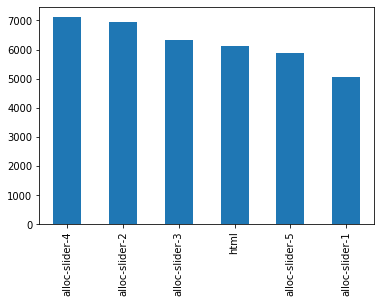

In [16]:
df_lab['target'].value_counts().plot(kind = 'bar')

In [17]:
# See if we can improve on the turk data by renaming more targets

# Rename turk data 
# rename some html elemets to alloc-slider-X

# Reload df_turk as original unaltered data
df_turk = pd.read_csv('turk-Data.csv', index_col=0)

df_turk.loc[df_turk['target'].str.contains('alloc-slider-return-0'), 'target'] = 'alloc-slider-1'
df_turk.loc[df_turk['target'].str.contains('alloc-slider-return-1'), 'target'] = 'alloc-slider-2'
df_turk.loc[df_turk['target'].str.contains('alloc-slider-return-2'), 'target'] = 'alloc-slider-3'
df_turk.loc[df_turk['target'].str.contains('alloc-slider-return-3'), 'target'] = 'alloc-slider-4'
df_turk.loc[df_turk['target'].str.contains('alloc-slider-return-4'), 'target'] = 'alloc-slider-5'

df_turk.loc[df_turk['target'].str.contains('alloc-slider-risk-0'), 'target'] = 'alloc-slider-1'
df_turk.loc[df_turk['target'].str.contains('alloc-slider-risk-1'), 'target'] = 'alloc-slider-2'
df_turk.loc[df_turk['target'].str.contains('alloc-slider-risk-2'), 'target'] = 'alloc-slider-3'
df_turk.loc[df_turk['target'].str.contains('alloc-slider-risk-3'), 'target'] = 'alloc-slider-4'
df_turk.loc[df_turk['target'].str.contains('alloc-slider-risk-4'), 'target'] = 'alloc-slider-5'

# Now sliders are renamed we can deal with the other html elements

df_turk.loc[df_turk['target'].str.contains('>'), 'target'] = 'html'

# Also remove some of the other nosensical data such as saved-port-6 and parsley-id-137
df_turk.loc[df_turk['target'].str.contains('port'), 'target'] = 'html'
df_turk.loc[df_turk['target'].str.contains('parsley'), 'target'] = 'html'
df_turk.loc[df_turk['target'].str.contains('portfolio-stats'), 'target'] = 'html'

# Other elements could be kept, but lets remove them as that will make it simplier and theyre not that frequent anyway
df_turk.loc[df_turk['target'].str.contains('investment-results'), 'target'] = 'html'
df_turk.loc[df_turk['target'].str.contains('risk-return'), 'target'] = 'html'
df_turk.loc[df_turk['target'].str.contains('content'), 'target'] = 'html'

df_turk['target'].value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


html              469722
alloc-slider-2    190130
alloc-slider-5    177458
alloc-slider-4    169760
alloc-slider-1    143466
alloc-slider-3    142537
Name: target, dtype: int64

In [18]:
# Remove duplicates
turk_dups = len(df_turk)-len(df_turk.drop_duplicates())
print(f'Number of duplicate items in Turk data: {turk_dups}')
print(f'Percentage duplicate: {turk_dups / len(df_turk) * 100}')

df_turk = df_turk.drop_duplicates()
df_turk['target'].value_counts()

Number of duplicate items in Turk data: 319714
Percentage duplicate: 24.725131527763708


html              368643
alloc-slider-2    139265
alloc-slider-5    128444
alloc-slider-4    124034
alloc-slider-1    106968
alloc-slider-3    106005
Name: target, dtype: int64

In [19]:
# Remove Id's with missing values

users_with_all_targets = df_turk[df_turk['target'] == "alloc-slider-5"] ['turkId'].unique() # No 9, 10, 11
print( len(users_with_all_targets) )  
all_users = df_turk['turkId'].unique()
print(len(all_users))

users_missing_values = list(set(all_users) - set(users_with_all_targets))
print(len(users_missing_values))

for ID in users_missing_values:
    df_turk = df_turk[df_turk['turkId'] != ID] 

print(len(df_turk['turkId'].unique() ))

389
461
72
389


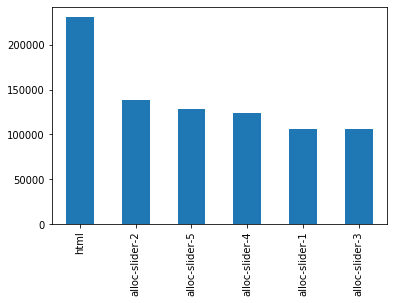

In [20]:
# This plot now looks perfect
# Now the distributions for the lab and turk look very similar, with the most frequent target being approximately half as common as html other.

df_turk['target'].value_counts().plot(kind = 'bar')

In [21]:
# Save the new renamed data
df_turk.to_csv('turk-Data-renamed.csv')
df_lab.to_csv('lab-Data-renamed.csv')

In [22]:
# load them back in.
df_turk = pd.read_csv('turk-Data-renamed.csv', index_col=0)
df_lab = pd.read_csv('lab-Data-renamed.csv', index_col=0)


# Initial Data Exploration

Focusing first on the Turk data get some ideas of whats happening in the data.

In [23]:
# Number of users for each dataset
print(f"Turk Number of unique Ids = { len(df_turk['turkId'].unique()) }")
print(f"Lab  Number of unique Ids = { len(df_lab['turkId'].unique()) } \n")

# Find largest mouse position
print( f"Turk Largest x = { df_turk['x'].max() }, y = { df_turk['y'].max() } " )
print( f"Lab  Largest x = { df_lab['x'].max() }, y = { df_lab['y'].max() } " )



Turk Number of unique Ids = 389
Lab  Number of unique Ids = 14 

Turk Largest x = 1879.0, y = 2344.0 
Lab  Largest x = 1913.0, y = 1355.0 


We can see that the Turk data contains many more individuals than the Lab data. To make the initial exploration easier I will take a small subset of the Turk data of roughly equal size to the Lab data.

In [24]:
# Get first 18 Ids from Turk Data
firstIds = df_turk['turkId'].unique()[:18]
df_turk_small = df_turk[ df_turk['turkId'].isin(firstIds) ]

print(f"Turk_small Number of unique Ids = { len(df_turk_small['turkId'].unique()) }")

df_turk_small

Turk_small Number of unique Ids = 18


,button,event_type,target,time,x,y,step,turkId
0,1,mousedown,alloc-slider-1,0.000,477.0,405.0,1,A35YFAFWP33C70
1,1,mouseup,alloc-slider-1,0.111,478.0,405.0,1,A35YFAFWP33C70
2,1,click,alloc-slider-1,0.111,478.0,405.0,1,A35YFAFWP33C70
3,1,mousedown,alloc-slider-1,1.516,479.0,405.0,1,A35YFAFWP33C70
4,1,mousedirchange,alloc-slider-1,2.395,543.0,403.0,1,A35YFAFWP33C70
...,...,...,...,...,...,...,...,...
26234,1,click,html,359.411,714.0,1286.0,1,A2455EWYEN7OGF
26235,1,click,html,359.411,714.0,1286.0,2,A2455EWYEN7OGF
26236,1,click,html,359.411,714.0,1286.0,3,A2455EWYEN7OGF
26237,1,click,html,359.411,714.0,1286.0,4,A2455EWYEN7OGF


# Viewing Mouse Paths

He I aim to visualise the paths a users mouse has taken over the course of the task. Maybe we could see that the lab mouse data is more messy if theyre constantly tweaking the results, but turk data may be neater as they don't mess around as much.

These initial results don't see to reveal too much.
 
TODO maybe in the future save these plots as images feed into a CNN just to see what happens? 

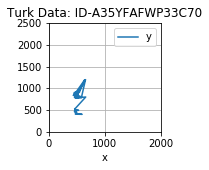

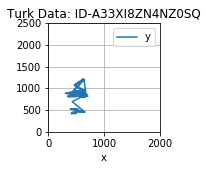

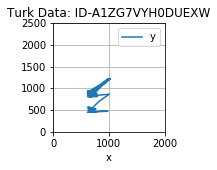

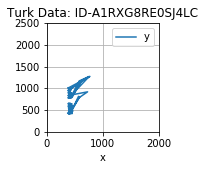

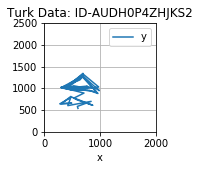

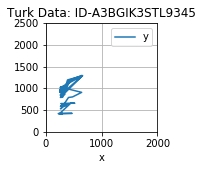

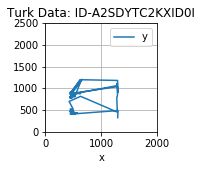

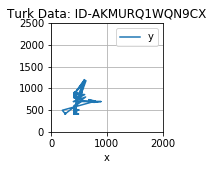

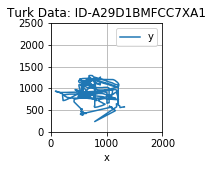

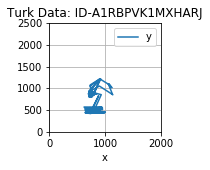

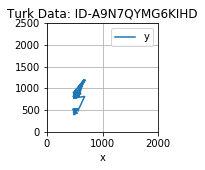

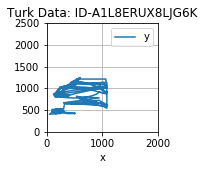

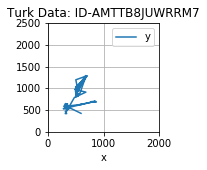

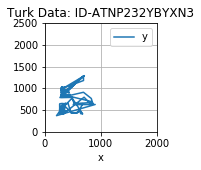

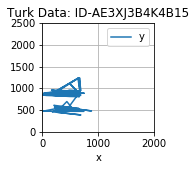

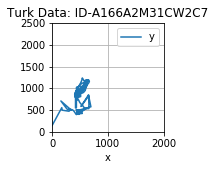

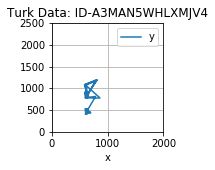

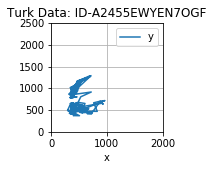

In [25]:
# View paths of Smaller Turk Data

import matplotlib.pyplot as plt

turk_small_Ids = df_turk_small['turkId'].unique()

for ID in turk_small_Ids:
    title_format = f'Turk Data: ID-{ID}'
    df_turk_small[ df_turk_small['turkId'] == ID ].plot(kind='line', x ='x', y='y', grid=True, xlim=[0,2000], ylim=[0,2500], figsize=(2,2), title=title_format)

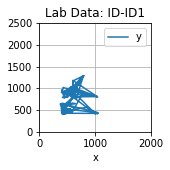

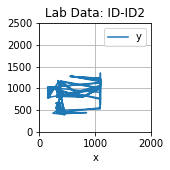

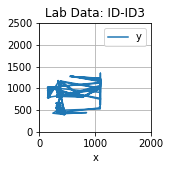

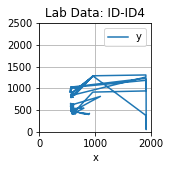

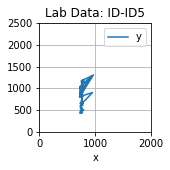

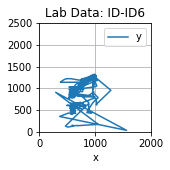

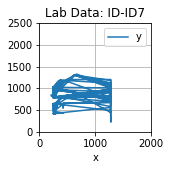

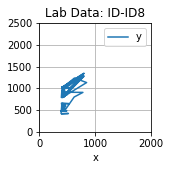

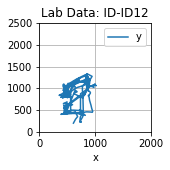

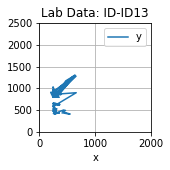

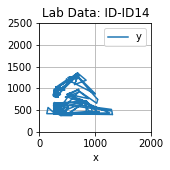

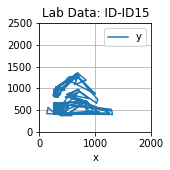

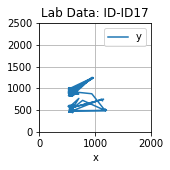

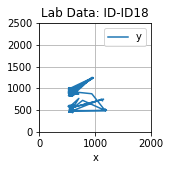

In [26]:
# View paths of Lab Data

lab_Ids = df_lab['turkId'].unique()

for ID in lab_Ids:
    title_format = f'Lab Data: ID-{ID}'
    df_lab[ df_lab['turkId'] == ID ].plot(kind='line', x ='x', y='y', grid=True, xlim=[0,2000], ylim=[0,2500], figsize=(2,2), title=title_format)

# Comparing Steps

Every mouse event in the datasets have a step from 1 to 5. Perhaps looking at how many events are in each step would reveal some differences in Turk or Lab data? Lab users may have a high number of events for the first few steps but have a lower number of events by the last step as they get more used to the task. Turk users may constantly have a low number of mouse events for each step as they don't pay attention.

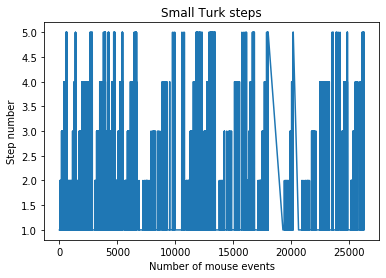

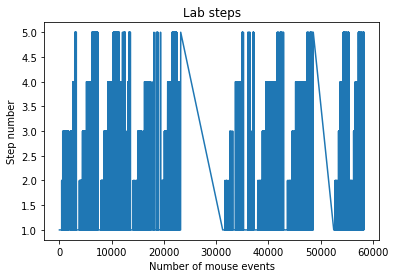

In [27]:
df_turk_small['step'].plot(title='Small Turk steps')
plt.xlabel('Number of mouse events')
plt.ylabel('Step number')
plt.show()

df_lab['step'].plot(title='Lab steps')
plt.xlabel('Number of mouse events')
plt.ylabel('Step number')
plt.show()

For the same number of users there seems to be twice as many events with the lab data, are we on to something?

TODO Try steps over time to see if this reveals more.

# Time

Attempt to see if there is any difference in time of the lab and turk data.

In [28]:
# Ordering all the Turks by the total time taken we can see that 2 rows have 10^12 seconds and one row took 0s.
# Remove these records as they cannot be correct.
print(df_turk.groupby('turkId').time.max().sort_values(ascending = False))

# Remove reccords from all Turk data, and small turk data
df_turk = df_turk[ (df_turk.turkId!='A21Y22J7Q0KSGN') & (df_turk.turkId!='AKMURQ1WQN9CX') &(df_turk.turkId!='A18TCR555RWUZV') ]

df_turk_small = df_turk_small[ (df_turk_small.turkId!='A21Y22J7Q0KSGN') & (df_turk_small.turkId!='AKMURQ1WQN9CX') & (df_turk.turkId!='A18TCR555RWUZV')]


turkId
AKMURQ1WQN9CX     1.415765e+12
A21Y22J7Q0KSGN    1.415606e+12
A16DELN8V1CH9R    2.052240e+03
A32S54OU6YX0RL    1.591131e+03
A29ERTCD6HF72I    1.160752e+03
                      ...     
A34SUZWGLXIWM8    5.790700e+01
A244267S3IML6R    5.680200e+01
A1GIA6WCGRJRY7    3.447700e+01
A3U3CCIR1ZXEOR    2.062500e+01
A18TCR555RWUZV    0.000000e+00
Name: time, Length: 389, dtype: float64
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [29]:
# Remove users as they have a time of 1,415,605,709,647.55s and 1,415,764,970,154.82s which must mean something went wrong in the calculations somewhere

small_turk_times = df_turk_small.groupby('turkId').time.max().mean()
print(f'First 18 Turk average time to complete tasks: {small_turk_times} seconds\n')

turk_times = df_turk.groupby('turkId').time.max().mean()
print(f'All 400ish Turk average time to complete tasks: {turk_times} seconds\n')

lab_times = df_lab.groupby('turkId').time.max().mean()
print(f'Lab average time to complete tasks: {lab_times} seconds\n')


First 18 Turk average time to complete tasks: 228.1334117647059 seconds

All 400ish Turk average time to complete tasks: 341.10121761658024 seconds

Lab average time to complete tasks: 465.55293892857134 seconds



# Time Visualisations

This shows some interesting results.
It appears that, on average, a Lab user will take almost 2 minutes more to complete the tasks.
See if we can visualise this as Data Visualisation is amazing and important :)


In [30]:
import numpy as np

# Data will be the total time taken for a user to complete the tasks.
turk_data = df_turk.groupby('turkId').time.max().to_numpy()
lab_data  = df_lab.groupby('turkId').time.max().to_numpy()
all_data = np.append( turk_data, lab_data )

# Labels will be 1 for turk data and 0 for lab data
labels = np.append( np.ones(len(turk_data)), np.zeros(len(lab_data)) )

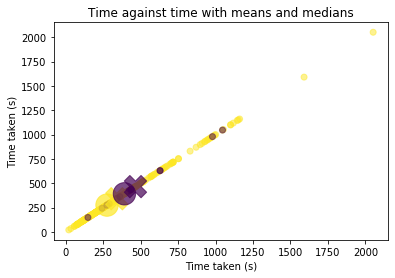

In [31]:
#
plt.scatter(all_data, all_data, c=labels, alpha=0.5 )

plt.scatter( ( turk_data.mean(),lab_data.mean() ), ( turk_data.mean(),lab_data.mean() ), marker='X', c=[1,0], s=500, alpha=0.7 )

plt.scatter( ( np.median(turk_data), np.median(lab_data) ), ( np.median(turk_data), np.median(lab_data) ), marker='o', c=[1,0], s=500, alpha=0.7 )

plt.xlabel('Time taken (s)')
plt.ylabel('Time taken (s)')
plt.title('Time against time with means and medians')
plt.show()

The plot has shown us that while there is a difference in mean and median between the 2 groups they do not form clusters that could be used for classification purposes from just the time data.

Now create a 2D plot to see if the points can be better seperated.

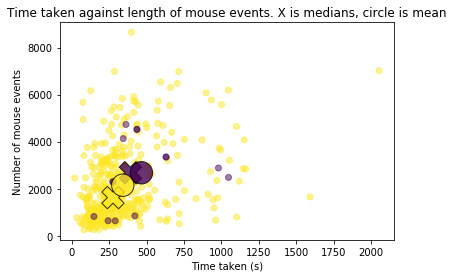

In [32]:
# Get number of mouse events data.

count_lab = df_lab.groupby('turkId').time.count().to_numpy()
count_turk = df_turk.groupby('turkId').time.count().to_numpy()
count_data = np.append( count_turk, count_lab )

# plot
plt.scatter(all_data, count_data, c=labels, alpha=0.5)
plt.scatter( ( np.median(turk_data),np.median(lab_data) ), ( np.median(count_turk),np.median(count_lab) ), marker='X', c=[1,0], s=500, alpha=0.8, edgecolors='black' )
plt.scatter( ( np.mean(turk_data),np.mean(lab_data) ), ( np.mean(count_turk),np.mean(count_lab) ), marker='o', c=[1,0], s=500, alpha=0.8, edgecolors='black' )

plt.title('Time taken against length of mouse events. X is medians, circle is mean')
plt.xlabel('Time taken (s)')
plt.ylabel('Number of mouse events')
plt.show()

Pearsons correlation: 0.349
Coefficients: 2.1932290522397735
Intercept: 1407.3561101915602
Equation of the line in for y=m*X+c = y=2.1932290522397735*X1407.3561101915602 


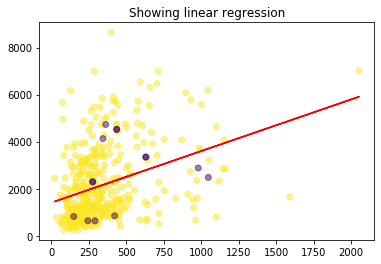

In [33]:
# It looks like the time taken and number of mouse events are not correlated.
# This is surprising.
# Calculate pearsons correlation to see correlation.
# Need value of 0.5 or above to show correlation.
# 0.286 shows strongly no correlation.

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

corr, _ = pearsonr(all_data, count_data)
print('Pearsons correlation: %.3f' % corr)

# Now plot a linear Regression to explain results visually
reg = LinearRegression().fit(all_data.reshape(-1,1), count_data.reshape(-1,1))

print(f'Coefficients: {reg.coef_[0][0]}')
print(f'Intercept: {reg.intercept_[0]}')
print(f'Equation of the line in for y=m*X+c = y={reg.coef_[0][0]}*X{reg.intercept_[0]} ')

plt.scatter(all_data, count_data, c=labels, alpha=0.5)
plt.title('Showing linear regression')
#intercept, slope, corr_coeff = plot_linear_regression(X, y)
plt.plot(all_data.reshape(-1,1), reg.coef_[0][0]*all_data.reshape(-1,1)+reg.intercept_[0], 'r')

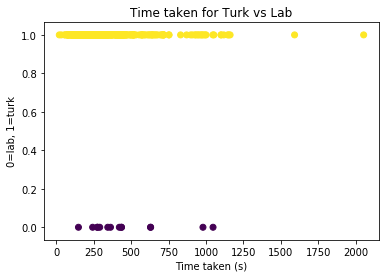

Text(0, 0.5, '0=lab, 1=turk')

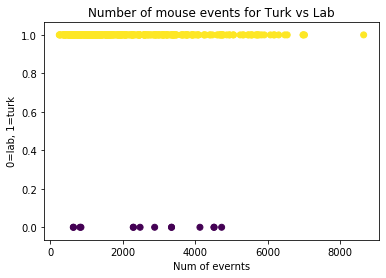

In [34]:
#x = np.append(all_data, labels, axis=1)
time = np.vstack((all_data, labels))

plt.scatter(time[0], time[1], c=labels)
plt.title('Time taken for Turk vs Lab')
plt.xlabel('Time taken (s)')
plt.ylabel('0=lab, 1=turk')
plt.show()

count = np.vstack((count_data, labels))

plt.scatter(count[0], count[1], c=labels)
plt.title('Number of mouse events for Turk vs Lab')
plt.xlabel('Num of evernts')
plt.ylabel('0=lab, 1=turk')


# Initial Machine Learning Techniques
After the data visualisations it doesn't appear we can tell the difference between the Turk or Lab data from these plotted attributes. 

Regardless a Support Vector Machine was tried to see if it could classify a test datapoint to either Turk or Lab data.

In [35]:
# TODO deal with imbalenced data
# We have uneven class sizes. 18 vs 400ish

# https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18
# https://machinelearningmastery.com/what-is-imbalanced-classification/

# TODO techniques listed here Resampling?

# TODO compair any classifier I create with a baseline model: https://towardsdatascience.com/from-sklearn-import-478c711dafa1


SVC(C=10, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
[[ 14   0]
 [  0 386]]


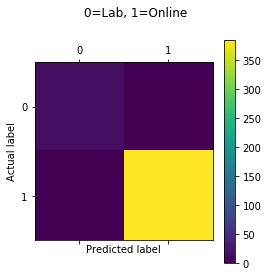

Accuracy: 0.8525
Precision: 0.9823008849557522
Recall: 0.8626943005181347


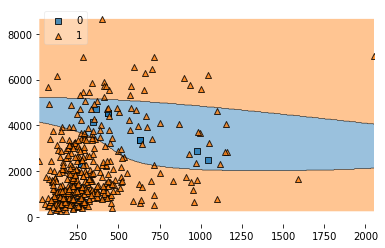

In [36]:
from sklearn import svm
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions

# We will be trying the 2 attributes time vs mouse events
X = np.column_stack((all_data, count_data))
y = labels  # 0 is lab, 1 is online
# TODO split into training and testing data in the future, but for now we will just test with the training set.


clf = svm.SVC(C=10, kernel='rbf', class_weight='balanced') # Linear Kernel
print(clf.fit(X, y) )
y_pred = clf.predict(X)

cm = metrics.confusion_matrix(y, y)
print(cm)
plt.matshow(cm)
plt.suptitle('0=Lab, 1=Online')
plt.colorbar()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

plot_decision_regions(X=X, y=y.astype(np.integer), clf=clf, legend=2)

print("Accuracy:", metrics.accuracy_score(y, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y, y_pred))

Number of lab data in train:  10
Number of lab data in test:  4

SVC(C=100, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
[[ 1  3]
 [26 90]]


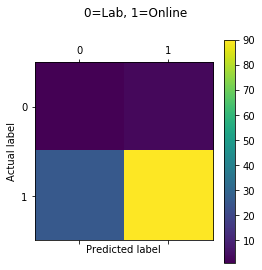

Accuracy: 0.7583333333333333
Precision: 0.967741935483871
Recall: 0.7758620689655172


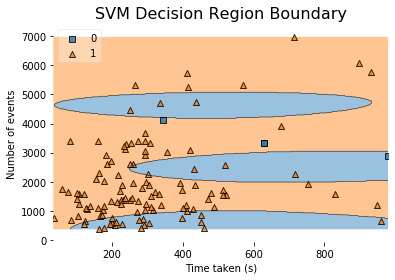

In [37]:
# Try SVM with test / train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100) # 70% training and 30% test

print('Number of lab data in train: ', np.count_nonzero( y_train == 0) )
print('Number of lab data in test: ', np.count_nonzero( y_test == 0) )
print()

#try SVM
clf2 = svm.SVC(C=100, kernel='rbf', class_weight='balanced') # Linear Kernel
print(clf2.fit(X_train, y_train) )
y_pred = clf2.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
plt.matshow(cm)
plt.suptitle('0=Lab, 1=Online')
plt.colorbar()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

plot_decision_regions(X=X_test, y=y_test.astype(np.integer), clf=clf2, legend=2)
#plt.scatter(lab_data, count_lab, c='purple', alpha=0.5, label='Lab')
#plt.scatter(X_train[:], X_train[:], c='purple', alpha=0.5, label='Lab')
plt.xlabel('Time taken (s)')
plt.ylabel('Number of events')
plt.title('SVM Decision Region Boundary', size=16)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred))

In [38]:
# NEW #################################

# First SVM was better, attempt this with the first X number of turk data so classes are of even size.
# 18 lab data samples.
# So get first 18 / 18 random samples from online data.

# Data will be the total time taken for a user to complete the tasks.
balanced_data = np.append( turk_data[:len(lab_data)], lab_data )

balanced_count_data = np.append( count_turk[:len(count_lab)], count_lab )

# Labels will be 1 for turk data and 0 for lab data
balanced_labels = np.append( np.ones(len(lab_data)), np.zeros(len(lab_data)) )



In [39]:
# Get random elements from online data


In [40]:
len(lab_data)

14

SVC(C=10, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
[[14  0]
 [ 0 14]]


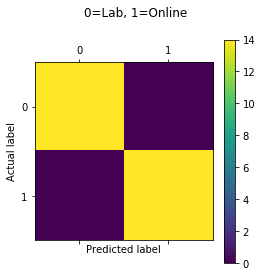

Accuracy: 0.6071428571428571
Precision: 0.6
Recall: 0.6428571428571429


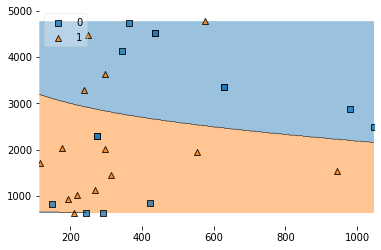

In [41]:

X = np.column_stack((balanced_data, balanced_count_data))
y = balanced_labels  # 0 is lab, 1 is online
# TODO split into training and testing data in the future, but for now we will just test with the training set.


clf3 = svm.SVC(C=10, kernel='rbf', class_weight='balanced') # Linear Kernel
print(clf3.fit(X, y) )
y_pred = clf3.predict(X)

cm = metrics.confusion_matrix(y, y)
print(cm)
plt.matshow(cm)
plt.suptitle('0=Lab, 1=Online')
plt.colorbar()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

plot_decision_regions(X=X, y=y.astype(np.integer), clf=clf3, legend=2)

print("Accuracy:", metrics.accuracy_score(y, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y, y_pred))

# N-Grams

Try and understand how ngrams work and how they may be used in this project.

In [55]:
# Did N-Grams and NLP methods in other notebook